> Бакин Владислав Артемович, ИВТ-23-1б

# Practice 10-22-2024

## Упражнение: Вычисление числа pi с помощью метода Монте-Карло

1. ### Формулы

Площадь квадрата: $s = (2 r)^2$

Площадь круга: $c = \pi r^2$

$c/s = (\pi r^2)/(4r^2) = \pi /4$

$pi = 4 * c/s$

![](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

2. ### Импорт требуемых библиотек

In [1]:
import random
import matplotlib.pyplot as plt

3. ### Инициализация количества точек

In [2]:
num_points = 1000

6. ### Броски дротиков

In [3]:
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "blue"))
    else:
        points.append((x, y, "red"))

7. ### Построение графика результатов

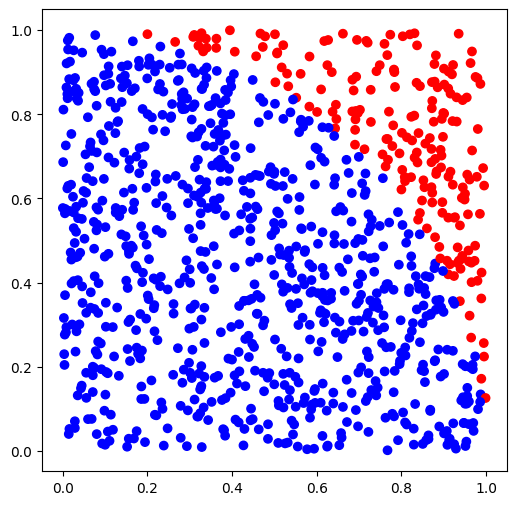

In [4]:
x, y, colors = zip(*points)

fig, ax = plt.subplots() 
fig.set_size_inches(6.0, 6.0)

ax.scatter(x, y, c=colors)

8. ### Вычисление оценки для pi

In [5]:
fraction = hits / num_points
4 * fraction

3.216

## Блокноты и контроль версий

### Работаем с обычным git diff

1. Для понимания проблемы можно посмотреть пример блокнота (https://github.com/coderefinery/jupyter/blob/main/example/darts.ipynb), а затем исходный код (https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.ipynb) в формате `JSON`.
2. Затем мы вносим в пример блокнота простые изменения, например, меняем цвета (заменяем "красный" и "синий" на что-то другое), а также меняем размеры в `fig.set_size_inches(6.0, 6.0)`
3. Запускаем все ячейки.
4. Сохраняем изменение (значок сохранения) и в терминале JupyterLab пробуем "нормальный" `gitdiff` и видим, что это не очень хорошо сработало. Напишите почему в ячейке с комментарием ниже.

### Пояснение

Вывод `git diff` можно посмотреть в APE/prac1/diff_output.txt

1. Изменение формата: Блокноты Jupyter хранятся в формате JSON, который содержит не только код, но и метаданные, результаты выполнения и т. д.
2. Сложные различия: При внесении небольших изменений в код (например, изменения цветов и размеров) Git может отобразить много изменений в структуре JSON, что затрудняет восприятие значимых изменений.
3. Невозможность понятного сравнения: Из-за этого `git diff` показывает множество несущественных изменений, и трудно понять, что конкретно было изменено в коде.

### Упражнение: что происходит без `requirements.txt`?

Рассмотрим тот же репозиторий неравенства действий. (https://github.com/timalthoff/activityinequality)

- Запустите репозиторий в Binder (или у себя), используя эту ссылку. (https://mybinder.org/v2/gh/timalthoff/
activityinequality/master)
- `fig3/fig3bc.ipynb` это блокнот на языке Python, поэтому он работает в Binder. Большинство других - на языке R, который также работает в Binder. Но как? https://mybinder.readthedocs.io/en/latest/howto/languages.html
- Попробуйте запустить блокнот. Что произойдет?
- Скорее всего, прогон упадёт сразу в первой ячейке:

```python
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") from
itertools import cycle
```

Мы получаем длинный список сообщений `ModuleNotFoundError`. Это связано с тем, что
требуемые Python пакеты не были установлены и не могут быть импортированы. К
недостающим пакетам относятся, по крайней мере `pandas` и `matplotlib`.

Чтобы установить недостающие зависимости, добавьте в начало блокнота новую ячейку
кода с содержанием:

```python
!python3 -m pip install pandas matplotlib
```
и запустите блокнот снова. Что произойдет теперь?

Запуск опять прерывается из-за отсутствия пакетов! На этот раз виновником является
пакет `seaborn`. Изменим первую ячейку так, чтобы она также устанавливалась с помощью:

```python
!python3 -m pip install pandas matplotlib seaborn
```
и попробуйте запустить ноутбук в третий раз. Работает ли он теперь? Что можно было
бы сделать по-другому со стороны разработчика? Напишите ответ в комментарии.

Хороший способ сделать блокнот более удобным для использования - создать файл
`requirements.txt` содержащий пакеты, необходимые для работы блокнота, и добавьте его
рядом с блокнотом в репозиторий.

В нашем случае это может выглядеть следующим образом:

```
pandas
matplotlib
seaborn
```
а чтобы убедиться, что пакеты установлены, можно добавить в начало исходного
блокнота ячейку кода со строкой:

```python
!python3 -m pip install -r requirements.txt
```
Чтобы быть уверенным в том, что ноутбук будет работать и через несколько месяцев (после
обновления зависимостей), необходимо, чтобы в файле `requirements.txt` также была
указана та же версия, которую вы использовали при работе. Попробуйте указать в своём
блокноте текущую версию ваших зависимостей.

### Консольные команды, виджеты оболочки и немного магии (cell magic)

Используя блокнот `computing-pi`, потренируйтесь в использовании нескольких полезных
команд. Помните, что команды ячейки должны располагаться в первой строке ячейки.

1. В ячейке с `for-loop` (там, где `num_points`) добавьте `%%timeit` и запустите ячейку
2. В той же ячейке попробуйте запустить `%%prun`
3. Попробуйте внести ошибку в код (например, использовать неправильное имя переменной:
points.append((`x`, `y2`, `True`))

- запустите ячейку
- после того как поймайте `exception` запустите `%debug` в новой ячейке и зайдите в
интерактивный отладчик
- нажмите `h` для того чтобы отобразилось меню помощи и используйте `help <keyword>` для
подсказки по ключевому слову
- наберите `p` `x` для того, чтобы вывести значение `x`
- выйдите из отладчика нажав `q`

Посмотрите на вывод команды `%lsmagic`. Используйте кнопки с одним и двумя знаками вопроса,
чтобы посмотреть справку.

### Давайте попробуем виджеты

Виджеты могут использоваться для интерактивного изучения или анализа данных.

1. Вернемся к примеру с аппроксимацией pi и создадим новую ячейку, в которой
повторим написанный ранее код, но на этот раз поместим его в функции. Это "скрывает" детали и
чувствительные данные, а также позволяет повторно использовать функции позже или в других
блокнотах:

```python
from matplotlib import pyplot
import random
from ipywidgets import interact, widgets

%matplotlib inline


def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points


def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)


def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

```

2. Попробуйте поэкспериментировать с функцией `experiment`. Например, можно попробовать
поставить `num_points = 2000`
3. Добавьте ячейку, в которой мы сделаем возможным интерактивное изменение
количества точек:

```python
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))
```

> Если вы столкнулись с проблемой `Error displaying widget: model not found` то, возможно, потребуется обновить страницу.
>

4. Перетащите ползунок вперед-назад и понаблюдайте за результатами.
5. Можете ли вы назвать другие интересные варианты использования виджетов? Напишите ответ в комментарии

### Виджеты для интерактивной подгонки данных (data fitting)

Виджеты - это довольно интересны инструмент сам по себе, но они также могут быть и
полезными. Ниже пример, показывающий, как можно в интерактивном режиме подгонять
шумные данные (noisy data).

1. Выполните приведенную ниже ячейку. Она подгоняет полином 5-го порядка к гауссовой
функции с некоторым случайным шумом
2. Используйте декоратор @interact вокруг двух последних строк кода, чтобы можно было
визуализировать подгонки с полиномиальными порядками в диапазоне, скажем, от 3 до 30:

```python
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)


def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y


def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit


def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()


x, y = noisy_gaussian()
yfit = fit(x, y, n=5)  # fit a 5th order polynomial to it
plot(x, y, yfit)

```


### Профилирование ячеек

Это упражнение посвящено профилированию ячеек, но ещё и включает в себя практику
работы с магией (cell magic) и ячейками.

1. Скопируйте и вставьте в ячейку следующий код:

```python
import numpy as np
import matplotlib.pyplot as plt


def step():
    import random
    return 1. if random.random() > .5 else -1.


def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x


n = 100000
x = walk(n)

```

2. Разделите функции на 4 ячейки (либо через меню `Edit`, либо с помощью сочетания клавиш
`Ctrl-Shift-Minus`)
3. Постройте траекторию случайного движения с помощью `plt.plot(x)`
4. Засеките выполнение `walk()` с помощью `%timeit`. Например `t1 = %timeit -o walk(n)`
5. Запустите профилировщик ячеек обрезки: `%%prun` и `walk(n)`
6. Можете ли вы заметить небольшую ошибку, которая замедляет работу кода?
7. В следующем упражнении вы установите линейный профилировщик, который
позволит легче выявить ошибку в производительности.

### Установка команды для профилирования строк

"Магические команды" (cell magic) могут быть установлены с помощью `pip` и загружаются как плагины
с помощью `%load_ext`. Давайте теперь установим линейный профайлер, чтобы получить более
подробный отчёт и, надеюсь, найти понимание, как ускорить код из предыдущего упражнения.

Если вы не решили предыдущее упражнение, скопируйте и вставьте в ячейку
следующий код и выполните его:

```python
import numpy as np
import matplotlib.pyplot as plt


def step():
    import random
    return 1. if random.random() > .5 else -1.


def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x


n = 100000
x = walk(n)

```

2. Затем установите профилировщик строк с помощью `!pip install line_profiler`.
3. Далее загрузите его с помощью `%load_ext line_profiler`. Посмотрите на новую магическую команду, которая была включена с помощью `%lprun`?
5. В новой ячейке запустите профилировщик строк для функций walk и step. Его можно поставить таким же образом, как это описано на странице с помощью
6. Посмотрите полученный результат. Можно ли теперь более наглядно увидеть ошибку? Если да, то опишите в комментарии к книге где находится ошибка

**Решение:**

Скопируйте код в ячейку

```
!pip install line_profiler
```

Загрузите расширение `lPython`

```
%load_ext line_profiler
```

Посмотрите текст справки

```
%lprun?
```

Используйте профилировщик строк на функции walk:

```
%lprun -f walk walk(10000)
```

Большинство времени было потрачено на вызов `step()`, значит запустим профайлер на `step`

```
%lprun -f step walk(10000)
```

```
...
     8                                           def step():
     9      9999       7488.0      0.7     52.3      import random
    10      9999       6840.0      0.7     47.7      return 1. if random.random()
...
```

Больше всего времени тратится на импорт модуля `random` в функции `step`, тысячи
вызовов звучат не очень оптимально. Как можно решить эту проблему? Ответ нужно
написать в ячейке с комментариями.